In [16]:
from keras import models
from kb.models import dice_coeff, bce_dice_loss
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

### Model for position detection

In [17]:
positionDetectionModels = [
    # models.load_model(
    #     "models/oben.hdf5",
    #     custom_objects = {
    #         'bce_dice_loss': bce_dice_loss,
    #         'dice_coeff': dice_coeff
    #     }
    # ),
    models.load_model(
        "models/seite.hdf5",
        custom_objects = {
            'bce_dice_loss': bce_dice_loss,
            'dice_coeff': dice_coeff
        }
    ),
    models.load_model(
        "models/unter.hdf5",
        custom_objects = {
            'bce_dice_loss': bce_dice_loss,
            'dice_coeff': dice_coeff
        }
    ),
]

### Model for classification

In [18]:
classificationModels = [
    models.load_model("models/classification_oben.hdf5"),
    models.load_model("models/classification_seite.hdf5"),
    models.load_model("models/classification_unter.hdf5"),
]

### Functions and const

In [19]:
size = (256, 256)

def normalize_image(img):
    return np.array(img/256)

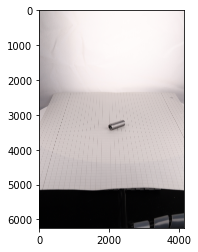

In [20]:
imagePath = "data/original/Kegelstift/DIN7978-A/8x24/Seite/IMG_7824_E.JPG"
image = imread(imagePath)
plt.imshow(image)

In [21]:
resizedImage = normalize_image(cv.resize(image, size))
objects = []
for positionDetectionModel in positionDetectionModels:
    result = positionDetectionModel.predict(np.array([resizedImage]))
    objects.append(result)

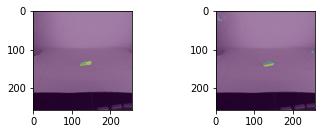

In [22]:
for object, i in zip(objects, range(len(objects))):
    plt.subplot(2, 2, i+1)
    plt.imshow(resizedImage)
    plt.imshow(object[0], alpha=0.5)